# Chi-Squared Test for Experimentation Analytics:
## Compare proportions in A/B Testing
This notebook illustrates **chi-squared tests** for A/B testing in user growth analytics. It includes explanations of purpose, logic, and math, with Python implementations and visualizations.

## Purpose
A **chi-squared test** tests for independence in categorical data, ideal for comparing proportions in A/B tests. Here, we test if a new referral bonus increases sign-up rates (binary outcome: sign-up vs. no sign-up).

## Logic and Math

- **Logic**: The chi-squared test measures how much observed frequencies ($O_{ij}$) deviate from expected frequencies ($E_{ij}$) under the null hypothesis (groups and outcomes are independent). A small p-value (< 0.05) rejects the null, indicating a significant relationship (e.g., the bonus affects sign-up rates).
- **Contingency Table**: A matrix showing frequency counts for two categorical variables (rows: Control/Treatment; columns: No Sign-Up/Sign-Up). Cells contain observed frequencies ($O_{ij}$) for each combination.
- **Expected Frequency ($E_{ij}$)**: The frequency expected in each cell if the null hypothesis is true (no relationship). Calculated as:
  $$E_{ij} = \frac{(\text{Row Total}_i) \cdot (\text{Column Total}_j)}{\text{Grand Total}}$$
  - $i$: Row index (e.g., Control=1, Treatment=2).
  - $j$: Column index (e.g., No Sign-Up=1, Sign-Up=2).
  - Example: For 1000 Control users, 1000 Treatment users, and 458 total sign-ups out of 2000 users, the expected frequency for Control/Sign-Up is: $$E_{12} = \frac{1000 \cdot 458}{2000} = 229$$
- **Chi-Squared Statistic**: Sums deviations across all cells: $$\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$
    - $O_{ij}$: Observed frequency in cell $(i,j)$.
    - $E_{ij}$: Expected frequency in cell $(i,j)$.
    - $O_i$, $E_i$: In the formula, $i$ iterates over all cells (e.g., $O_{11}, O_{12}, O_{21}, O_{22}$) when summing, while $(i,j)$ specifies row-column positions for clarity.
- **Formula (Chi-Squared Test for Independence)**:
  $$  \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$
  - $O_i$: Observed frequency in category $i$.
  - $E_i$: Expected frequency.  
- **Degrees of Freedom**: Determine the chi-squared distribution shape:
  $$df = (r-1)(c-1)$$
  - $r$: Number of rows in contingency table (2: Control, Treatment).
  - $c$: Number of columns in contingency table (2: No Sign-Up, Sign-Up).
  - Example: $df = (2-1)(2-1) = 1$.
- **P-value**: Derived from the chi-squared distribution, indicates significance. If p < 0.05, the bonus significantly affects sign-up rates.

## Example: Referral Bonus A/B Test
We simulate sign-up outcomes for 1000 users in a control group (no bonus, 20% sign-up rate) and 1000 users in a treatment group (new bonus, 25% sign-up rate). We hypothesize the bonus increases sign-up rates.

Chi-Squared Statistic: {chi2_stat:.4f}
P-value: {p_value:.4f}
Degrees of Freedom: {dof}
Contingency Table (Observed Frequencies):
           No Sign-Up  Sign-Up
Control           801      199
Treatment         742      258

Expected Frequencies:
           No Sign-Up  Sign-Up
Control         771.5    228.5
Treatment       771.5    228.5
Reject null hypothesis: New bonus significantly affects sign-up rates.


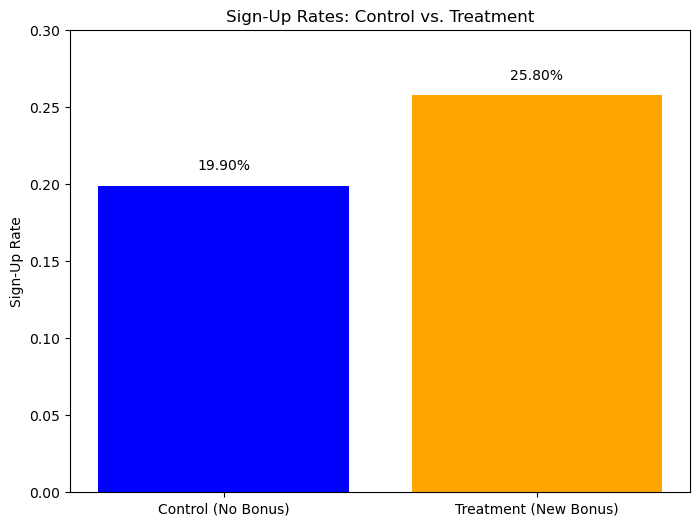

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data: contingency table [control, treatment] x [no sign-up, sign-up]
# Control: 20% sign-up rate; Treatment: 25% sign-up rate
control = np.random.choice([0, 1], size=1000, p=[0.8, 0.2])  # 0 = No Sign-Up, 1 = Sign-Up
treatment = np.random.choice([0, 1], size=1000, p=[0.75, 0.25])
contingency_table = np.array([[np.sum(control == 0),   np.sum(control == 1)],
                              [np.sum(treatment == 0), np.sum(treatment == 1)]])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Squared Statistic: {chi2_stat:.4f}")
print("P-value: {p_value:.4f}")
print("Degrees of Freedom: {dof}")
print("Contingency Table (Observed Frequencies):")
print(pd.DataFrame(contingency_table, index=['Control', 'Treatment'], columns=['No Sign-Up', 'Sign-Up']))
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=['Control', 'Treatment'], columns=['No Sign-Up', 'Sign-Up']))
if p_value < 0.05:
    print("Reject null hypothesis: New bonus significantly affects sign-up rates.")
else:
    print("Fail to reject null hypothesis: No significant effect.")

# Plot results
sign_up_rates = [contingency_table[0, 1] / contingency_table[0].sum(), contingency_table[1, 1] / contingency_table[1].sum()]
plt.figure(figsize=(8, 6))
plt.bar(['Control (No Bonus)', 'Treatment (New Bonus)'], sign_up_rates, color=['blue', 'orange'])
plt.title('Sign-Up Rates: Control vs. Treatment')
plt.ylabel('Sign-Up Rate')
plt.ylim(0, 0.3)
for i, rate in enumerate(sign_up_rates):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center')
plt.show()

**Output Interpretation**:
- **Chi-Squared Statistic**: Measures deviation of observed frequencies from expected frequencies.
- **P-value**: If < 0.05, the new bonus significantly increases sign-up rates.
- **Contingency Table**: Shows observed frequencies (e.g., 199 sign-ups in Control).
- **Expected Frequencies**: Shows frequencies under the null hypothesis (e.g., ~229 sign-ups expected for Control).
- **Plot**: Bar plot compares sign-up rates (~20% vs. ~25%), visualizing the bonus’s effect."

## Conclusion

- **Chi-Squared Tests**: Ideal for categorical outcomes (e.g., sign-up rates), using the chi-squared statistic to test independence.
- **Application**: Supports experimentation focus, enabling data-driven decisions for user growth (e.g., optimizing referral programs).